In [1]:
import numpy as np
import pandas as pd

In [2]:
#读入各数据

In [3]:
train=pd.read_csv(r"E:\学习资料\人工智能\大数据竞赛\data_format1\data_format1\train_format1.csv").drop_duplicates()
train.head(5)

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


In [4]:
test=pd.read_csv(r"E:\学习资料\人工智能\大数据竞赛\data_format1\data_format1\test_format1.csv")
test.head(5)

,user_id,merchant_id,prob
0,163968,4605,NaN
1,360576,1581,NaN
2,98688,1964,NaN
3,98688,3645,NaN
4,295296,3361,NaN


In [5]:
user_info=pd.read_csv(r"E:\学习资料\人工智能\大数据竞赛\data_format1\data_format1\user_info_format1.csv")
user_info.head(5)

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [6]:
user_info.isnull().sum()

user_id         0
age_range    2217
gender       6436
dtype: int64

In [7]:
age_range=user_info.loc[:,"age_range"].values.reshape(-1,1)
age_range[:5]

array([[6.],
       [5.],
       [5.],
       [5.],
       [5.]])

In [8]:
from sklearn.impute import SimpleImputer
imp_0=SimpleImputer(strategy="constant",fill_value=0)
imp_0=imp_0.fit_transform(age_range)
imp_0[:5]

array([[6.],
       [5.],
       [5.],
       [5.],
       [5.]])

In [9]:
user_info.loc[:,"age_range"]=imp_0

In [10]:
gender=user_info.loc[:,"gender"].values.reshape(-1,1)

In [11]:
imp_2=SimpleImputer(strategy="constant",fill_value=2)
imp_2=imp_2.fit_transform(gender)
imp_2[:5]

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [12]:
user_info.loc[:,"gender"]=imp_2

In [13]:
user_info=pd.get_dummies(user_info,columns=['age_range'])
user_info=pd.get_dummies(user_info,columns=['gender'])

In [14]:
user_log=pd.read_csv(r"E:\学习资料\人工智能\大数据竞赛\data_format1\data_format1\user_log_format1.csv").rename(columns={"seller_id":"merchant_id"})
user_log.head()

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


In [15]:
#合并训练集，测试集和用户信息

In [16]:
train=train.merge(user_info,on=["user_id"])
test=test.merge(user_info,on=["user_id"])

In [17]:
train.head(5)

,user_id,merchant_id,label,age_range_0.0,age_range_1.0,age_range_2.0,age_range_3.0,age_range_4.0,age_range_5.0,age_range_6.0,age_range_7.0,age_range_8.0,gender_0.0,gender_1.0,gender_2.0
0,34176,3906,0,0,0,0,0,0,0,1,0,0,1,0,0
1,34176,121,0,0,0,0,0,0,0,1,0,0,1,0,0
2,34176,4356,1,0,0,0,0,0,0,1,0,0,1,0,0
3,34176,2217,0,0,0,0,0,0,0,1,0,0,1,0,0
4,230784,4818,0,1,0,0,0,0,0,0,0,0,1,0,0


In [18]:
test.head(5)

,user_id,merchant_id,prob,age_range_0.0,age_range_1.0,age_range_2.0,age_range_3.0,age_range_4.0,age_range_5.0,age_range_6.0,age_range_7.0,age_range_8.0,gender_0.0,gender_1.0,gender_2.0
0,163968,4605,NaN,1,0,0,0,0,0,0,0,0,1,0,0
1,360576,1581,NaN,0,0,1,0,0,0,0,0,0,0,0,1
2,98688,1964,NaN,0,0,0,0,0,0,1,0,0,1,0,0
3,98688,3645,NaN,0,0,0,0,0,0,1,0,0,1,0,0
4,295296,3361,NaN,0,0,1,0,0,0,0,0,0,0,1,0


In [19]:
user_info_log=user_log.merge(user_info,on=["user_id"])

In [20]:
user_info_log.head(20)

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type,age_range_0.0,age_range_1.0,age_range_2.0,age_range_3.0,age_range_4.0,age_range_5.0,age_range_6.0,age_range_7.0,age_range_8.0,gender_0.0,gender_1.0,gender_2.0
0,328862,323294,833,2882,2661.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0
1,328862,844400,1271,2882,2661.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0
2,328862,575153,1271,2882,2661.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0
3,328862,996875,1271,2882,2661.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0
4,328862,1086186,1271,1253,1049.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0
5,328862,623866,1271,2882,2661.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0
6,328862,542871,1467,2882,2661.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0
7,328862,536347,1095,883,1647.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0
8,328862,364513,1271,2882,2661.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0
9,328862,575153,1271,2882,2661.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0


In [21]:
user_info_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
user_id          1048575 non-null int64
item_id          1048575 non-null int64
cat_id           1048575 non-null int64
merchant_id      1048575 non-null int64
brand_id         1047248 non-null float64
time_stamp       1048575 non-null int64
action_type      1048575 non-null int64
age_range_0.0    1048575 non-null uint8
age_range_1.0    1048575 non-null uint8
age_range_2.0    1048575 non-null uint8
age_range_3.0    1048575 non-null uint8
age_range_4.0    1048575 non-null uint8
age_range_5.0    1048575 non-null uint8
age_range_6.0    1048575 non-null uint8
age_range_7.0    1048575 non-null uint8
age_range_8.0    1048575 non-null uint8
gender_0.0       1048575 non-null uint8
gender_1.0       1048575 non-null uint8
gender_2.0       1048575 non-null uint8
dtypes: float64(1), int64(6), uint8(12)
memory usage: 76.0 MB


In [22]:
user_info_log.isnull().sum(axis=0)

user_id             0
item_id             0
cat_id              0
merchant_id         0
brand_id         1327
time_stamp          0
action_type         0
age_range_0.0       0
age_range_1.0       0
age_range_2.0       0
age_range_3.0       0
age_range_4.0       0
age_range_5.0       0
age_range_6.0       0
age_range_7.0       0
age_range_8.0       0
gender_0.0          0
gender_1.0          0
gender_2.0          0
dtype: int64

In [23]:
user_info_log=user_info_log.dropna(subset=["brand_id"])

In [24]:
user_info_log.isnull().sum(axis=0)

user_id          0
item_id          0
cat_id           0
merchant_id      0
brand_id         0
time_stamp       0
action_type      0
age_range_0.0    0
age_range_1.0    0
age_range_2.0    0
age_range_3.0    0
age_range_4.0    0
age_range_5.0    0
age_range_6.0    0
age_range_7.0    0
age_range_8.0    0
gender_0.0       0
gender_1.0       0
gender_2.0       0
dtype: int64

In [25]:
user_info_log.head()

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type,age_range_0.0,age_range_1.0,age_range_2.0,age_range_3.0,age_range_4.0,age_range_5.0,age_range_6.0,age_range_7.0,age_range_8.0,gender_0.0,gender_1.0,gender_2.0
0,328862,323294,833,2882,2661.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0
1,328862,844400,1271,2882,2661.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0
2,328862,575153,1271,2882,2661.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0
3,328862,996875,1271,2882,2661.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0
4,328862,1086186,1271,1253,1049.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0


In [26]:
#查看训练集中标签种类有哪些

In [27]:
from sklearn.preprocessing import LabelEncoder
y=train.iloc[:,2]
le=LabelEncoder()
le=le.fit(y)

In [28]:
le.classes_

array([0, 1], dtype=int64)

In [29]:
#检查信息中年龄信息，发现没有小于18岁的购物记录

In [30]:
y=user_info_log.loc[:,"age_range_1.0"]
le=LabelEncoder()
le=le.fit(y)
le.classes_

array([0], dtype=uint8)

In [31]:
###################特征处理#########################

###################用户角度#########################

In [32]:
#特征一：用户每个月产生动作的次数

In [33]:
#从记录中提取月份
user_info_log['month']=user_info_log['time_stamp']//100
#user_info_log['day']=user_info_log['time_stamp']%100
#del user_info_log['time_stamp']

In [34]:
user_info_log[1000:1005]

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type,age_range_0.0,age_range_1.0,age_range_2.0,age_range_3.0,age_range_4.0,age_range_5.0,age_range_6.0,age_range_7.0,age_range_8.0,gender_0.0,gender_1.0,gender_2.0,month
1000,149002,754044,1213,3736,3125.0,521,0,0,0,0,0,0,1,0,0,0,0,0,1,5
1001,149002,871086,368,1190,1500.0,1107,0,0,0,0,0,0,1,0,0,0,0,0,1,11
1002,149002,1074027,964,3791,1500.0,1111,0,0,0,0,0,0,1,0,0,0,0,0,1,11
1003,149002,1099256,606,4606,4383.0,820,0,0,0,0,0,0,1,0,0,0,0,0,1,8
1004,149002,989660,577,3791,1500.0,1111,0,0,0,0,0,0,1,0,0,0,0,0,1,11


In [35]:
#size() 返回每个分组的元素个数
t=user_info_log.groupby(['user_id','month']).size().reset_index().rename(columns={0:'user_month_cnt'})
#t.head()

In [36]:
#get_dummies类别变量向量化,pandas提供对one-hot编码的函数
t=pd.get_dummies(t,columns=['month'])

In [37]:
#t.head()

In [38]:
#计算每个用户每个月操作次数
for i in range(5,12,1):
    t['month_'+str(i)]*=t['user_month_cnt']

In [39]:
t=t.groupby(['user_id']).sum().reset_index()
t.head()

,user_id,user_month_cnt,month_5,month_6,month_7,month_8,month_9,month_10,month_11
0,16,67,0,0,0,0,26,15,26
1,19,113,0,0,6,0,2,0,105
2,244,126,13,5,4,29,0,22,53
3,259,193,12,0,0,1,0,1,179
4,281,75,1,1,0,15,42,1,15


In [40]:
t=t.rename(columns={'user_month_cnt':'user_sum','month_5':'user_month_5','month_6':'user_month_6','month_7':'user_month_7','month_8':'user_month_8','month_9':'user_month_9','month_10':'user_month_10','month_11':'user_month_11'})
t[:5]

,user_id,user_sum,user_month_5,user_month_6,user_month_7,user_month_8,user_month_9,user_month_10,user_month_11
0,16,67,0,0,0,0,26,15,26
1,19,113,0,0,6,0,2,0,105
2,244,126,13,5,4,29,0,22,53
3,259,193,12,0,0,1,0,1,179
4,281,75,1,1,0,15,42,1,15


In [41]:
#将特征放入训练集和测试集中
train=train.merge(t,on=['user_id'])
test=test.merge(t,on=['user_id'])

In [42]:
#train[:5]

In [43]:
#user_info_log[:5]

In [44]:
#用户其他特征
#1、用户对相应商家进行操作的次数
t=user_info_log.groupby(['user_id','merchant_id']).size()
t=t.reset_index().rename(columns={0:'用户对相应商家操作总数'})

In [45]:
#t[:5]

In [46]:
train=train.merge(t,on=["user_id","merchant_id"])
test=test.merge(t,on=["user_id","merchant_id"])

In [47]:
#train[:5]

In [48]:
#2、用户查询物品，种类，商家，品牌总数

In [49]:
#agg函数，它提供基于列的聚合操作
#set() 函数创建一个无序不重复元素集，可进行关系测试，删除重复数据，还可以计算交集、差集、并集等
#lamba函数冒号之前是参数，式子本身是值
columns = ['item_id', 'cat_id', 'merchant_id', 'brand_id']
for col in columns:
    t = user_info_log.groupby(['user_id']).agg({col:lambda x:len(set(x))}).reset_index().rename(columns={col:'用户查询的'+col+'个数'})
    train=train.merge(t,on=['user_id'])
    test=test.merge(t,on=['user_id'])

In [50]:
#train[:5]

In [51]:
#3、用户点击、购买、加入购物车、收藏总数
user_info_log[:5]

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type,age_range_0.0,age_range_1.0,age_range_2.0,age_range_3.0,age_range_4.0,age_range_5.0,age_range_6.0,age_range_7.0,age_range_8.0,gender_0.0,gender_1.0,gender_2.0,month
0,328862,323294,833,2882,2661.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0,8
1,328862,844400,1271,2882,2661.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0,8
2,328862,575153,1271,2882,2661.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0,8
3,328862,996875,1271,2882,2661.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0,8
4,328862,1086186,1271,1253,1049.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0,8


In [52]:
t=user_info_log.groupby(['user_id','action_type']).size().reset_index()

In [53]:
#t[:5]

In [54]:
t=pd.get_dummies(t,columns=['action_type'])

In [55]:
for i in range(0,4,1):
    t['action_type_'+str(i)]=t[0]*t['action_type_'+str(i)]

In [56]:
t=t.groupby(['user_id']).sum().reset_index()

In [57]:
del t[0]

In [58]:
t=t.rename(columns={'action_type_0':'点击总数','action_type_1':'加入购物车数','action_type_2':'购买总数','action_type_3':'收藏总数'})

In [59]:
train=train.merge(t,on=['user_id'])
test=test.merge(t,on=['user_id'])

In [60]:
#train[2530:2550]
t.head()

,user_id,点击总数,加入购物车数,购买总数,收藏总数
0,16,63,0,4,0
1,19,101,0,10,2
2,244,111,0,15,0
3,259,187,0,6,0
4,281,69,0,3,3


In [61]:
y=train.iloc[:,-3]
le=LabelEncoder()
le=le.fit(y)
le.classes_
#数据显示用户加入购物车数只有0和1，对数据存疑

array([0, 1], dtype=int64)

In [62]:
user_info_log[:5]

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type,age_range_0.0,age_range_1.0,age_range_2.0,age_range_3.0,age_range_4.0,age_range_5.0,age_range_6.0,age_range_7.0,age_range_8.0,gender_0.0,gender_1.0,gender_2.0,month
0,328862,323294,833,2882,2661.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0,8
1,328862,844400,1271,2882,2661.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0,8
2,328862,575153,1271,2882,2661.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0,8
3,328862,996875,1271,2882,2661.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0,8
4,328862,1086186,1271,1253,1049.0,829,0,0,0,0,0,0,0,1,0,0,0,1,0,8


In [63]:
########################商家角度################################

In [64]:
#4、对于商家（点击总数、加入购物车数、收藏、购买数）
t=user_info_log.groupby(['merchant_id','action_type']).size().reset_index()

In [65]:
#t[:5]

In [66]:
t=pd.get_dummies(t,columns=['action_type'])

In [67]:
#t[:5]

In [68]:
for i in range(0,4,1):
    t['action_type_'+str(i)]=t[0]*t['action_type_'+str(i)]

In [69]:
del t[0]

In [70]:
t=t.rename(columns={'action_type_0':'mer被点击总数','action_type_1':'mer被加入购物车数','action_type_2':'mer被购买总数','action_type_3':'mer被收藏总数'})

In [71]:
#t[:5]

In [72]:
t=t.groupby(['merchant_id']).sum().reset_index()

In [73]:
#t[:5]

In [74]:
train=train.merge(t,on=['merchant_id'])
test=test.merge(t,on=['merchant_id'])

In [75]:
#train[:5]

In [76]:
#商家被操作的总次数
t=user_info_log.groupby(['merchant_id']).size().reset_index().rename(columns={0:'商家被操作总数'})
train=train.merge(t,on=['merchant_id'])
test=test.merge(t,on=['merchant_id'])

In [77]:
#商家商品总数
#agg函数，它提供基于列的聚合操作
#set() 函数创建一个无序不重复元素集，可进行关系测试，删除重复数据，还可以计算交集、差集、并集等
#lamba函数冒号之前是参数，式子本身是值
t=user_info_log.groupby(['merchant_id']).agg({'item_id':lambda x :len(set(x))}).reset_index()

In [78]:
t=t.rename(columns={'item_id':'商家商品总数'})
train=train.merge(t,on=['merchant_id'])
test=test.merge(t,on=['merchant_id'])

In [79]:
#train[:5]

In [80]:
#pd.options.display.max_columns = None   #可以查看所有列 

In [81]:
#商家商品品牌数
t=user_info_log.groupby(['merchant_id']).agg({'brand_id':lambda x:len(set(x))}).reset_index().rename(columns={'brand_id':'商家品牌总数'})

In [82]:
train=train.merge(t,on='merchant_id')
test=test.merge(t,on='merchant_id')

In [83]:
#商家商品种类数
t=user_info_log.groupby(['merchant_id']).agg({'cat_id':lambda x:len(set(x))}).reset_index().rename(columns={'cat_id':'商家商品种类数'})
train=train.merge(t,on=['merchant_id'])
test=test.merge(t,on=['merchant_id'])

In [84]:
#train[1000:1005]

In [85]:
#商家每个月被操作数
t=user_info_log.groupby(['merchant_id','month']).size().reset_index().rename(columns={0:'商家每个月被操作数'})
t=pd.get_dummies(t,columns=['month'])

In [86]:
for i in range(5,12,1):
    t['month_'+str(i)]*=t['商家每个月被操作数']
t=t.groupby(['merchant_id']).sum().reset_index()

In [87]:
del t['商家每个月被操作数']

In [88]:
t=t.rename(columns={'month_5':'商家5月被操作数','month_6':'商家6月被操作数','month_7':'商家7月被操作数','month_8':'商家8月被操作数','month_9':'商家9月被操作数','month_10':'商家10月被操作数','month_11':'商家11月被操作数'})

In [89]:
train=train.merge(t,on=['merchant_id'])
test=test.merge(t,on=['merchant_id'])

In [90]:
#train[:5]

In [91]:
#用户对相应商家购买,收藏，加入购物车，点击总数
t=user_info_log.groupby(['user_id','merchant_id','action_type']).size().reset_index()
t=pd.get_dummies(t,columns=['action_type'])
for i in range(0,4,1):
    t['action_type_'+str(i)]*=t[0]
del t[0]
t=t.groupby(['user_id','merchant_id']).sum().reset_index()
t=t.rename(columns={'action_type_0':'用户对相应商家点击总数','action_type_1':'用户对相应商家加入购物车总数','action_type_2':'用户对相应商家购买总数','action_type_3':'用户对相应商家收藏总数'})

In [92]:
train=train.merge(t,on=['user_id','merchant_id'])
test=test.merge(t,on=['user_id','merchant_id'])

In [93]:
#用户对相应商家每个月操作次数
t=user_info_log.groupby(['user_id','merchant_id','month']).size().reset_index()
t=pd.get_dummies(t,columns=['month'])
for i in range(5,12,1):
    t['month_'+str(i)]*=t[0]
del t[0]
t=t.groupby(['user_id','merchant_id']).sum().reset_index().rename(columns={'month_5':'用户对相应商家5月操作次数','month_6':'用户对相应商家6月操作次数','month_7':'用户对相应商家7月操作次数','month_8':'用户对相应商家8月操作次数','month_9':'用户对相应商家9月操作次数','month_10':'用户对相应商家10月操作次数','month_11':'用户对相应商家11月操作次数'})
train=train.merge(t,on=['user_id','merchant_id'])
test=test.merge(t,on=['user_id','merchant_id'])

In [94]:
#用户对相应商家商品，品牌，类别数
t=user_info_log.groupby(['user_id','merchant_id']).agg({'item_id':lambda x:len(set(x))}).reset_index().rename(columns={'item_id':'user_merchant_item_cnt'})

In [95]:
train=train.merge(t,on=['user_id','merchant_id'])
test=test.merge(t,on=['user_id','merchant_id'])

In [96]:
t=user_info_log.groupby(['user_id','merchant_id']).agg({'brand_id':lambda x:len(set(x))}).reset_index().rename(columns={'brand_id':'user_merchant_brand_cnt'})
train=train.merge(t,on=['user_id','merchant_id'])
test=test.merge(t,on=['user_id','merchant_id'])
t=user_info_log.groupby(['user_id','merchant_id']).agg({'cat_id':lambda x:len(set(x))}).reset_index().rename(columns={'cat_id':'user_merchant_cat_cnt'})
train=train.merge(t,on=['user_id','merchant_id'])
test=test.merge(t,on=['user_id','merchant_id'])

In [97]:
train[:5]

,user_id,merchant_id,label,age_range_0.0,age_range_1.0,age_range_2.0,age_range_3.0,age_range_4.0,age_range_5.0,age_range_6.0,...,用户对相应商家5月操作次数,用户对相应商家6月操作次数,用户对相应商家7月操作次数,用户对相应商家8月操作次数,用户对相应商家9月操作次数,用户对相应商家10月操作次数,用户对相应商家11月操作次数,user_merchant_item_cnt,user_merchant_brand_cnt,user_merchant_cat_cnt
0,374400,302,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,29,17,1.0,1
1,336252,302,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,8,2,1.0,1
2,305873,302,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,22,10,1.0,1
3,189312,1760,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,42,30,2.0,1
4,421338,1760,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,13,1,1.0,1


In [98]:
t = user_info_log.query('action_type == 2')

In [99]:
t[:5]

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type,age_range_0.0,age_range_1.0,age_range_2.0,age_range_3.0,age_range_4.0,age_range_5.0,age_range_6.0,age_range_7.0,age_range_8.0,gender_0.0,gender_1.0,gender_2.0,month
19,328862,81766,614,4605,7622.0,709,2,0,0,0,0,0,0,1,0,0,0,1,0,7
23,328862,853901,267,3073,8126.0,805,2,0,0,0,0,0,0,1,0,0,0,1,0,8
24,328862,1102596,267,3073,8126.0,805,2,0,0,0,0,0,0,1,0,0,0,1,0,8
25,328862,963870,267,3073,8126.0,805,2,0,0,0,0,0,0,1,0,0,0,1,0,8
26,328862,813647,267,3073,8126.0,805,2,0,0,0,0,0,0,1,0,0,0,1,0,8


In [100]:
#决策树
from graphviz import Digraph
from sklearn import tree
from sklearn.model_selection import train_test_split

feature_names=list(train)  #获取特征名
data=train
x=data.iloc[:,data.columns!='label']
y=data.iloc[:,data.columns=='label']
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.3)

for i in [Xtrain,Xtest,Ytrain,Ytest]:#纠正随机后的索引
    i.reset_index()

clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest) #返回预测的准确度
score

0.8603603603603603

In [101]:
[*zip(feature_names,clf.feature_importances_)]

[('user_id', 0.07312890310643566),
 ('merchant_id', 0.0334677302482743),
 ('label', 0.0),
 ('age_range_0.0', 0.0),
 ('age_range_1.0', 0.0014432178181001277),
 ('age_range_2.0', 0.0),
 ('age_range_3.0', 0.013151900031833561),
 ('age_range_4.0', 0.0),
 ('age_range_5.0', 0.0035787983967292833),
 ('age_range_6.0', 0.005433672844093711),
 ('age_range_7.0', 0.0),
 ('age_range_8.0', 0.003513561635705383),
 ('gender_0.0', 0.0060441625757074735),
 ('gender_1.0', 0.0069427588484494976),
 ('gender_2.0', 0.022471669504213122),
 ('user_sum', 0.024264382910430055),
 ('user_month_5', 0.02104600604452228),
 ('user_month_6', 0.03679519756746513),
 ('user_month_7', 0.029963964956863737),
 ('user_month_8', 0.018528315667328946),
 ('user_month_9', 0.019236749955486975),
 ('user_month_10', 0.020169400888640013),
 ('user_month_11', 0.01034824976964327),
 ('用户对相应商家操作总数', 0.014841401057238033),
 ('用户查询的item_id个数', 0.019974527828391687),
 ('用户查询的cat_id个数', 0.02103431318518267),
 ('用户查询的merchant_id个数', 0.016447

In [102]:
import graphviz
feature_name=list(Xtrain)
dot_data=tree.export_graphviz(clf,
                              feature_names=feature_name,
                              class_names=["未重复购买","重复购买"]
                              ,out_file=None
                            )
graph=graphviz.Source(dot_data)

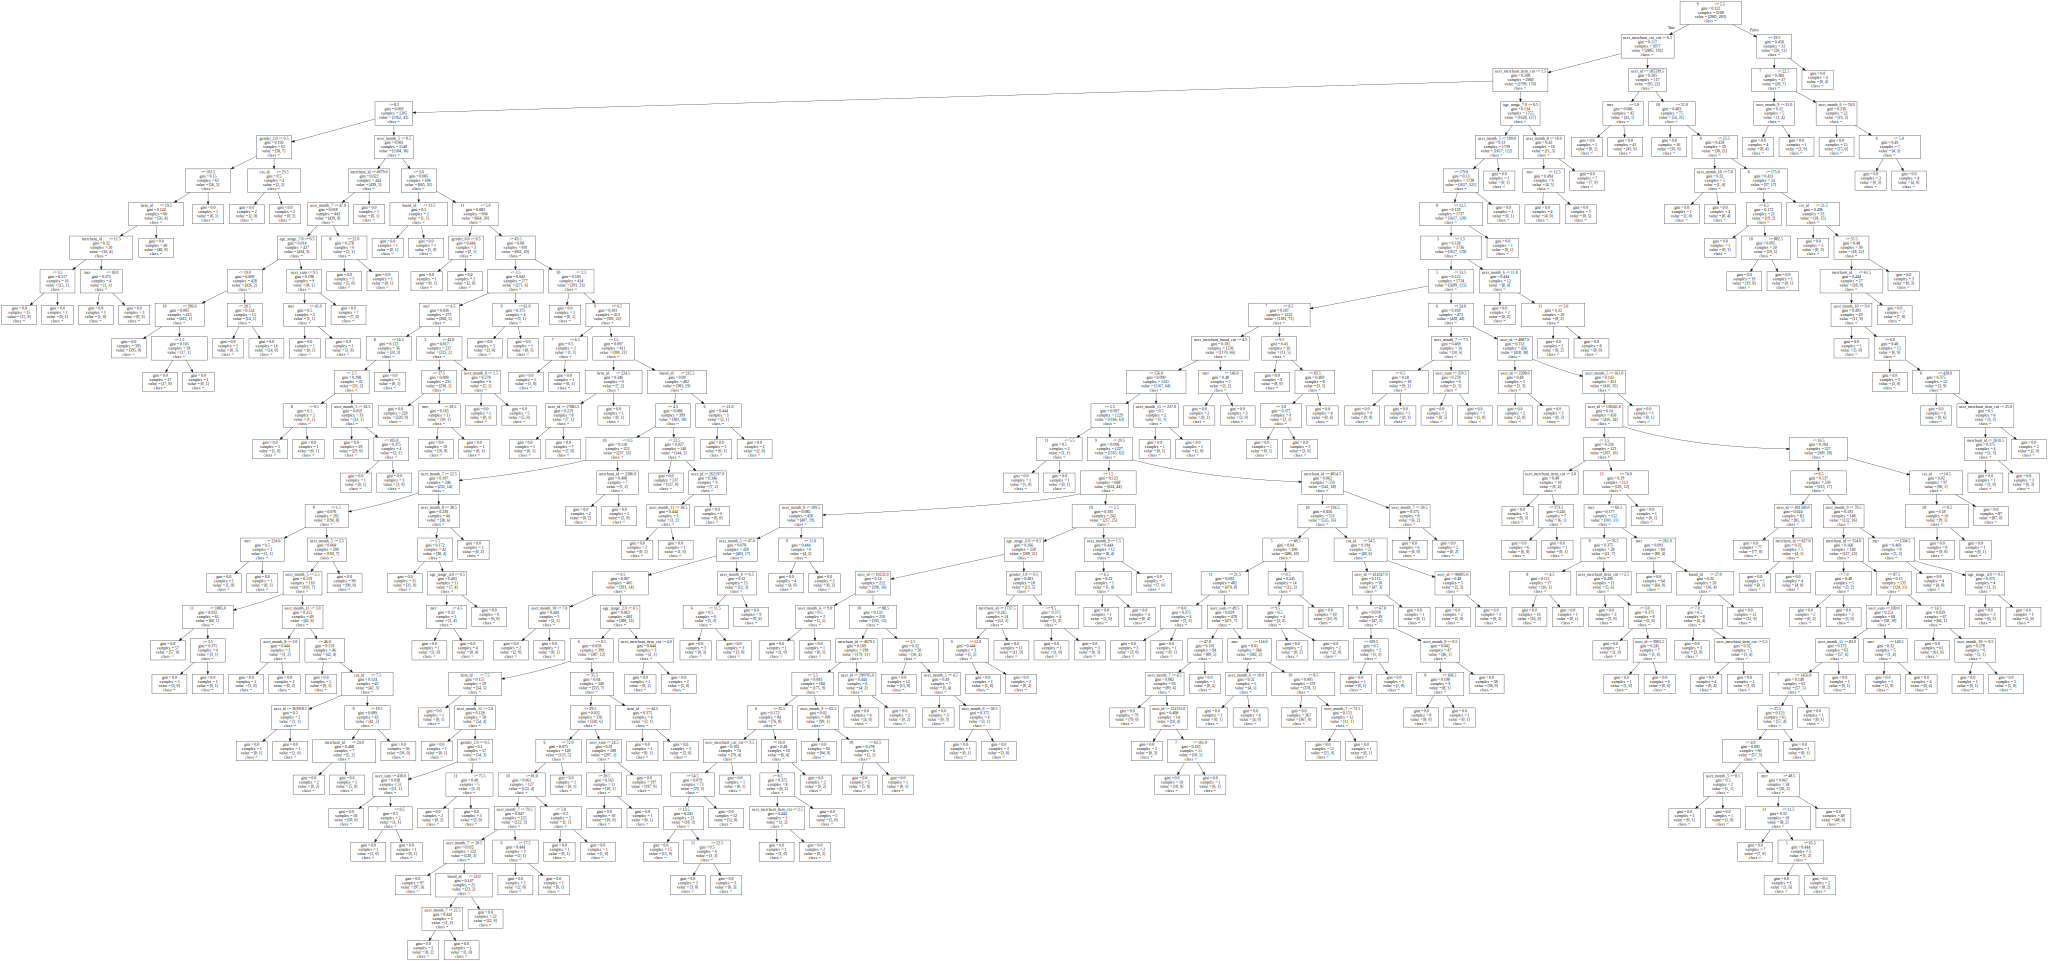

In [103]:
graph

In [104]:
dot_data=tree.export_graphviz(clf,
                              class_names=["repeat_buyers","not_repeat"]
                            )
graph=graphviz.Source(dot_data)
graph.render("repeat buyers prediction")

'repeat buyers prediction.pdf'

0.9364873707755489


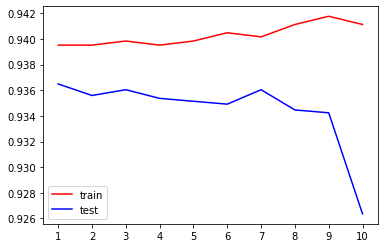

In [130]:
#调参，查看最大深度变化时，会有什么变化，画出学习曲线
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

tr=[]
te=[]
for i in range(10):
    clf=tree.DecisionTreeClassifier(random_state=30
                              ,max_depth=i+1
                              ,splitter='random'
                              ,min_samples_leaf=3
                              ,max_features=6
                              ,criterion='gini'
                                                )
    clf=clf.fit(Xtrain,Ytrain)
    score_tr=clf.score(Xtrain,Ytrain)
    score_te=cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color='red',label='train')
plt.plot(range(1,11),te,color='blue',label='test')
plt.xticks(range(1,11))
plt.legend()
plt.show()

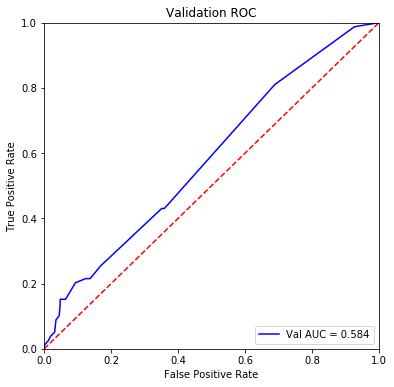

In [106]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
clf=DecisionTreeClassifier(random_state=30
                              ,max_depth=7
                              ,splitter='random'
                              ,min_samples_leaf=4
                              ,max_features=6
                              ,criterion='gini'
                                                )
clf=clf.fit(Xtrain,Ytrain)
pred = clf.predict_proba(Xtest)[:,1]
#############画图部分
fpr, tpr, threshold = metrics.roc_curve(Ytest, pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [107]:
clf=DecisionTreeClassifier(   random_state=30
                              ,max_depth=7
                              ,splitter='random'
                              ,min_samples_leaf=4
                              ,max_features=6
                              ,criterion='gini'
                          )
train_x=train.iloc[:,train.columns!='label']
train_y=train.iloc[:,train.columns=='label']
test_x=test.loc[:,test.columns!='prob']
test_y=test.loc[:,test.columns=='prob']
clf=clf.fit(train_x,train_y)
test_y=clf.predict_proba(test_x)
test_=test

In [108]:
test_y=pd.DataFrame(test_y)

In [109]:
del test_y[1]

In [110]:
del test_['prob']

In [111]:
pd.concat

<function pandas.core.reshape.concat.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)>

In [112]:
test_=pd.concat([test_,test_y],axis=1)

In [113]:
test_=test_.rename(columns={0:'prob'})

In [114]:
test_=test_[['user_id','merchant_id','prob']]

In [115]:
test_.to_csv('repeat buyers.csv',index=False)

In [116]:
#随机森林
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
data=train
x=data.iloc[:,data.columns!='label']
t=data.iloc[:,data.columns=='label']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3)
for i in [Xtrain,Xtest,Ytrain,Ytest]:#纠正随机后的索引
    i.reset_index()
rfc = RandomForestClassifier() 
rfc = rfc.fit(Xtrain,Ytrain)
score_r = rfc.score(Xtest,Ytest)
score_r

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


0.9286786786786787

0.9353617507735243 4


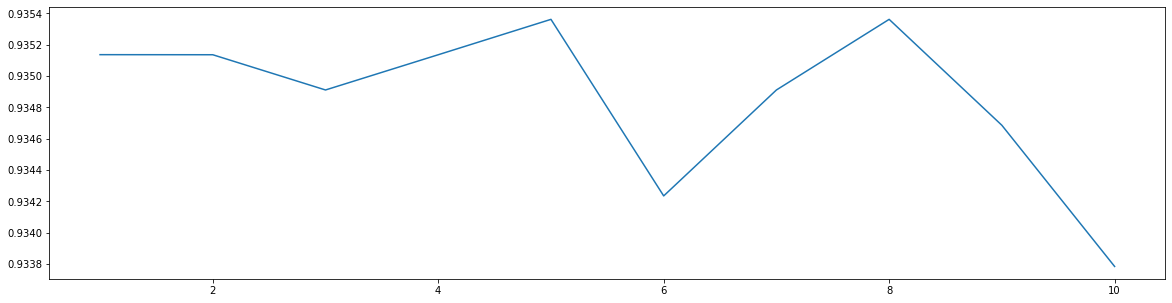

In [117]:
superpa=[]
for i in range(190,200):
    rfc=RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s=cross_val_score(rfc,x,y.values.ravel(),cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,11),superpa)
plt.show()

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


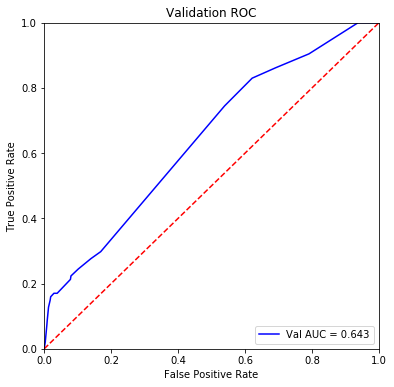

In [118]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
rfc=RandomForestClassifier(n_estimators=192
                          )
rfc=rfc.fit(Xtrain,Ytrain)
pred = clf.predict_proba(Xtest)[:,1]
#############画图部分
fpr, tpr, threshold = metrics.roc_curve(Ytest, pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [119]:
rfc=RandomForestClassifier()
train_x=train.iloc[:,train.columns!='label']
train_y=train.iloc[:,train.columns=='label']
test_x=test.loc[:,test.columns!='prob']
test_y=test.loc[:,test.columns=='prob']
rfc=rfc.fit(train_x,train_y)
test_y=rfc.predict_proba(test_x)
test_=test

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [120]:
test_y=pd.DataFrame(test_y)

In [121]:
test_=pd.concat([test_,test_y],axis=1)
test_=test_.rename(columns={0:'prob'})
test_=test_[['user_id','merchant_id','prob']]
test_.to_csv('repeat buyers_random forest.csv',index=False)

In [122]:
test.head()

,user_id,merchant_id,age_range_0.0,age_range_1.0,age_range_2.0,age_range_3.0,age_range_4.0,age_range_5.0,age_range_6.0,age_range_7.0,...,用户对相应商家5月操作次数,用户对相应商家6月操作次数,用户对相应商家7月操作次数,用户对相应商家8月操作次数,用户对相应商家9月操作次数,用户对相应商家10月操作次数,用户对相应商家11月操作次数,user_merchant_item_cnt,user_merchant_brand_cnt,user_merchant_cat_cnt
0,121728,2928,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,3,1,1.0,1
1,213393,2928,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,6,2,1.0,2
2,175251,2928,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,26,21,1.0,3
3,221115,2928,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,13,5,1.0,2
4,49878,2928,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,6,1,1.0,1


In [123]:
"""
training xgboost
"""
import xgboost as xgb
models_xgb = []
params={'booster':'gbtree',
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'max_depth':4,
        'lambda':10,
        'subsample':0.75,
        'colsample_bytree':0.75,
        'min_child_weight':2,
        'eta': 0.05,
        'seed':0,
#         'nthread':8,
         'silent':1}
for i in range(1, 6):
    X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.33, random_state=620 + 2 * i)
    dtrain = xgb.DMatrix(X_train, y_train)
    deval = xgb.DMatrix(X_test, y_test)
    print('Start training...')
    # train
    evals_result={}
    watchlist = [(dtrain,'train'), (deval, 'eval')]
    bst=xgb.train(params, dtrain, evals_result=evals_result,
                  num_boost_round=10000, 
                  evals=watchlist, 
                  early_stopping_rounds=100, 
                  verbose_eval=1)
    models_xgb.append((i, bst, evals_result))

Start training...
[0]	train-auc:0.511862	eval-auc:0.503133
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 100 rounds.
[1]	train-auc:0.527192	eval-auc:0.521889
[2]	train-auc:0.535687	eval-auc:0.528538
[3]	train-auc:0.549523	eval-auc:0.525964
[4]	train-auc:0.568646	eval-auc:0.547868
[5]	train-auc:0.575993	eval-auc:0.549714
[6]	train-auc:0.575915	eval-auc:0.550489
[7]	train-auc:0.575832	eval-auc:0.550513
[8]	train-auc:0.577009	eval-auc:0.548853
[9]	train-auc:0.576984	eval-auc:0.549322
[10]	train-auc:0.577094	eval-auc:0.549167
[11]	train-auc:0.583704	eval-auc:0.555812
[12]	train-auc:0.583756	eval-auc:0.55575
[13]	train-auc:0.587061	eval-auc:0.558732
[14]	train-auc:0.586988	eval-auc:0.558499
[15]	train-auc:0.589238	eval-auc:0.569637
[16]	train-auc:0.589236	eval-auc:0.570048
[17]	train-auc:0.591659	eval-auc:0.570002
[18]	train-auc:0.60708	eval-auc:0.593798
[19]	train-auc:0.607028	eval-auc:0.590693
[20]	train-a

In [128]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
params={'booster':'gbtree',
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'max_depth':5,
        'lambda':10,
        'subsample':0.75,
        'colsample_bytree':0.75,
        'min_child_weight':4,
        'eta': 0.025,
        'seed':0,
        'nthread':40,
        'silent':1}
model_xgb_base_feat = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=620)
for train_index, test_index in skf.split(x, y):
    print()
    dtrain = xgb.DMatrix(x, y)
    deval = xgb.DMatrix(x, y)
    print('Start training...')
    watchlist = [(dtrain,'train'), (deval, 'eval')]
    bst=xgb.train(params, dtrain, 
                  num_boost_round=10000, 
                  evals=watchlist, 
                  early_stopping_rounds=100, 
                  verbose_eval=1)
    model_xgb_base_feat.append(bst)


Start training...
[0]	train-auc:0.521882	eval-auc:0.521882
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 100 rounds.
[1]	train-auc:0.521922	eval-auc:0.521922
[2]	train-auc:0.541838	eval-auc:0.541838
[3]	train-auc:0.541845	eval-auc:0.541845
[4]	train-auc:0.541865	eval-auc:0.541865
[5]	train-auc:0.541871	eval-auc:0.541871
[6]	train-auc:0.550158	eval-auc:0.550158
[7]	train-auc:0.554058	eval-auc:0.554058
[8]	train-auc:0.555289	eval-auc:0.555289
[9]	train-auc:0.564809	eval-auc:0.564809
[10]	train-auc:0.564803	eval-auc:0.564803
[11]	train-auc:0.564793	eval-auc:0.564793
[12]	train-auc:0.564755	eval-auc:0.564755
[13]	train-auc:0.565937	eval-auc:0.565937
[14]	train-auc:0.591673	eval-auc:0.591673
[15]	train-auc:0.590562	eval-auc:0.590562
[16]	train-auc:0.590349	eval-auc:0.590349
[17]	train-auc:0.590361	eval-auc:0.590361
[18]	train-auc:0.590334	eval-auc:0.590334
[19]	train-auc:0.598966	eval-auc:0.598966
[20]	trai

In [129]:
"""
xgboost预测
"""
dtest = xgb.DMatrix(data=test_x)
for i, model, r in models_xgb:
    col = "prob_xgb_" + str(i)
    print(i, model, model.best_score)
    columns.append(col)
    test[col] = model.predict(data=dtest, ntree_limit=model.best_iteration)

1 <xgboost.core.Booster object at 0x00000269917372E8> 0.677827
2 <xgboost.core.Booster object at 0x000002698B93FBA8> 0.604163
3 <xgboost.core.Booster object at 0x000002698B25D7F0> 0.598871
4 <xgboost.core.Booster object at 0x0000026992796D68> 0.610735
5 <xgboost.core.Booster object at 0x00000269927F09E8> 0.632335
